# Final Project: Analysis plan
## Delaney Curran
### 12/07/2022

In [69]:
import pandas as pd
import numpy as np
#from sklearn import linear_model
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from scipy import stats
import json
import seaborn as sns

In [ ]:
from nba_api.stats.static import teams

nba_teams = teams.get_teams()
print('Number of teams fetched: {}'.format(len(nba_teams)))
nba_teams[:30]

In [3]:
from nba_api.stats.static import teams
nba_teams = teams.get_teams()

cavs = [team for team in nba_teams if team['abbreviation'] == 'CLE'][0]
cavs_id = cavs['id']

In [4]:
cavs

{'id': 1610612739,
 'full_name': 'Cleveland Cavaliers',
 'abbreviation': 'CLE',
 'nickname': 'Cavaliers',
 'city': 'Cleveland',
 'state': 'Ohio',
 'year_founded': 1970}

In [5]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.library.parameters import SeasonAll

cavs_games = leaguegamefinder.LeagueGameFinder(team_id_nullable=cavs_id).get_data_frames()[0]

In [6]:
cavs_games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612739,CLE,Cleveland Cavaliers,0022200360,2022-12-06,CLE vs. LAL,W,241,116,...,0.765,9,35,44,25,11,3,7,20,14.0
1,22022,1610612739,CLE,Cleveland Cavaliers,0022200348,2022-12-04,CLE @ NYK,L,240,81,...,0.750,8,31,39,17,7,6,17,15,-11.0
2,22022,1610612739,CLE,Cleveland Cavaliers,0022200330,2022-12-02,CLE vs. ORL,W,240,107,...,1.000,5,28,33,22,7,5,12,14,11.0
3,22022,1610612739,CLE,Cleveland Cavaliers,0022200312,2022-11-30,CLE vs. PHI,W,240,113,...,0.800,6,34,40,28,10,3,18,13,28.0
4,22022,1610612739,CLE,Cleveland Cavaliers,0022200303,2022-11-28,CLE @ TOR,L,240,88,...,0.813,13,34,47,21,7,3,9,18,-12.0


In [7]:
minuts = stats.describe(cavs_games['MIN'])
minuts

DescribeResult(nobs=3552, minmax=(46, 315), mean=240.5472972972973, variance=135.35456323684988, skewness=-5.299033315528454, kurtosis=92.2984709450983)

In [8]:
ast = stats.describe(cavs_games['AST'])
ast

DescribeResult(nobs=3552, minmax=(3, 45), mean=22.55152027027027, variance=33.48030746002268, skewness=0.324543227224016, kurtosis=0.35671019499135115)

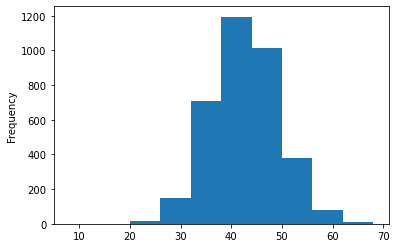

In [9]:
FT_PCT = cavs_games['REB'].plot.hist()
plt.show()

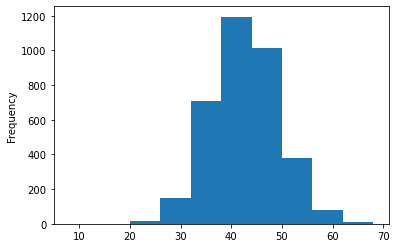

In [10]:
Reb = cavs_games['REB'].plot.hist()
plt.show()

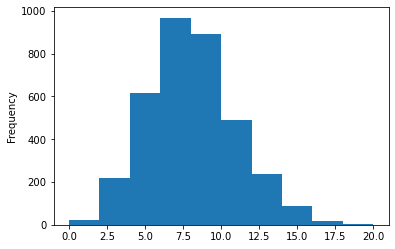

In [11]:
STL = cavs_games['STL'].plot.hist()
plt.show()

This is the data set that I will be working with for the final project. I am looking at Cleveland cavalier games from all seasons. I did some simple summaries so I can get the gist of the data set. One thing that I need to figure out is how to look at wins and losses because they are categorized as "W" and "L". I think that this data set is a good start for this project. I also used the help of https://github.com/swar/nba_api to understand how the NBA API works.

In [22]:
cavs_games1 = cavs_games.replace(to_replace = ["W", "L"], value = [0, 1])
cavs_games1

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612739,CLE,Cleveland Cavaliers,0022200360,2022-12-06,CLE vs. LAL,0,241,116,...,0.765,9,35,44,25,11,3,7,20,14.0
1,22022,1610612739,CLE,Cleveland Cavaliers,0022200348,2022-12-04,CLE @ NYK,1,240,81,...,0.750,8,31,39,17,7,6,17,15,-11.0
2,22022,1610612739,CLE,Cleveland Cavaliers,0022200330,2022-12-02,CLE vs. ORL,0,240,107,...,1.000,5,28,33,22,7,5,12,14,11.0
3,22022,1610612739,CLE,Cleveland Cavaliers,0022200312,2022-11-30,CLE vs. PHI,0,240,113,...,0.800,6,34,40,28,10,3,18,13,28.0
4,22022,1610612739,CLE,Cleveland Cavaliers,0022200303,2022-11-28,CLE @ TOR,1,240,88,...,0.813,13,34,47,21,7,3,9,18,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,21983,1610612739,CLE,Cleveland Cavaliers,0028300047,1983-11-04,CLE vs. DAL,0,240,105,...,1.000,16,34,50,24,8,6,16,29,NaN
3548,21983,1610612739,CLE,Cleveland Cavaliers,0028300031,1983-11-02,CLE vs. HOU,0,240,103,...,0.667,14,35,49,22,8,4,15,21,NaN
3549,21983,1610612739,CLE,Cleveland Cavaliers,0028300030,1983-11-01,CLE @ NJN,1,240,113,...,0.647,11,20,31,24,9,4,27,33,NaN
3550,21983,1610612739,CLE,Cleveland Cavaliers,0028300019,1983-10-29,CLE vs. BOS,1,240,89,...,0.810,16,28,44,16,8,6,19,26,NaN


Wins are coded as 0
Losses are coded as 1

In [ ]:
if ('vs.' in cavs_games1['MATCHUP'][1]):
    print('0')
else:
    print('1')
    
test = [1 if ('vs.' in x) else 0 for x in cavs_games1['MATCHUP']]
test

Home is coded as 1
Away is coded as 0

In [39]:
cavs_games1['HA'] = test
cavs_games1

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,HA
0,22022,1610612739,CLE,Cleveland Cavaliers,0022200360,2022-12-06,CLE vs. LAL,0,241,116,...,9,35,44,25,11,3,7,20,14.0,1
1,22022,1610612739,CLE,Cleveland Cavaliers,0022200348,2022-12-04,CLE @ NYK,1,240,81,...,8,31,39,17,7,6,17,15,-11.0,0
2,22022,1610612739,CLE,Cleveland Cavaliers,0022200330,2022-12-02,CLE vs. ORL,0,240,107,...,5,28,33,22,7,5,12,14,11.0,1
3,22022,1610612739,CLE,Cleveland Cavaliers,0022200312,2022-11-30,CLE vs. PHI,0,240,113,...,6,34,40,28,10,3,18,13,28.0,1
4,22022,1610612739,CLE,Cleveland Cavaliers,0022200303,2022-11-28,CLE @ TOR,1,240,88,...,13,34,47,21,7,3,9,18,-12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,21983,1610612739,CLE,Cleveland Cavaliers,0028300047,1983-11-04,CLE vs. DAL,0,240,105,...,16,34,50,24,8,6,16,29,NaN,1
3548,21983,1610612739,CLE,Cleveland Cavaliers,0028300031,1983-11-02,CLE vs. HOU,0,240,103,...,14,35,49,22,8,4,15,21,NaN,1
3549,21983,1610612739,CLE,Cleveland Cavaliers,0028300030,1983-11-01,CLE @ NJN,1,240,113,...,11,20,31,24,9,4,27,33,NaN,0
3550,21983,1610612739,CLE,Cleveland Cavaliers,0028300019,1983-10-29,CLE vs. BOS,1,240,89,...,16,28,44,16,8,6,19,26,NaN,1


In [40]:
cavs_games1.keys()

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'HA'],
      dtype='object')

In [41]:
count_WL = cavs_games1.groupby('WL').count()['GAME_ID']
count_WL

WL
0    1746
1    1804
O       1
T       1
Name: GAME_ID, dtype: int64

Out of the 3552 games 1804 are wins and 1706 are losses.

In [42]:
count_HA = cavs_games1.groupby('HA').count()['GAME_ID']
count_HA

HA
0    1761
1    1791
Name: GAME_ID, dtype: int64

Out of the 3552 games 1761 are home and 1791 are away.

In [48]:
WLHA = pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True)
WLHA

HA,0,1,All
WL,,,
0,664,1082,1746
1,1097,707,1804
O,0,1,1
T,0,1,1
All,1761,1791,3552


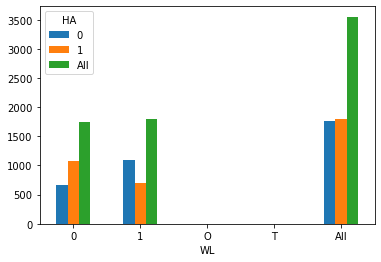

In [60]:
barplt_WL_HW = WLHA.plot.bar(rot=0)

As you can imagine the lowest category is wins away the next lowest category is losses at home. While away losses and home wins are fairly even.

I need to figure out how to illuminate O and T from the data

In [57]:
score = pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL])
score

HA   0     1         
WL   0  1  0  1  O  T
PTS                  
10   0  0  0  0  1  0
57   0  1  0  0  0  0
59   0  1  0  0  0  0
61   0  1  0  0  0  0
62   0  1  0  1  0  0
..  .. .. .. .. .. ..
141  0  0  1  0  0  0
142  0  0  1  0  0  0
144  0  0  1  0  0  0
147  0  0  1  0  0  0
148  0  1  1  0  0  0

[87 rows x 6 columns]

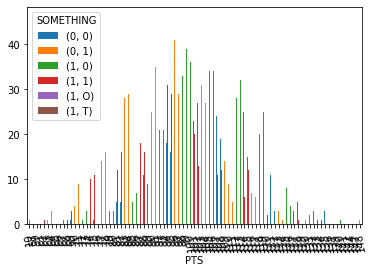

In [65]:
WL_HA_score = score.plot.bar(rot=100)
WL_HA_score.legend(title="key", loc= "upper left")

In [66]:
HA_score = pd.crosstab(cavs_games1.PTS,cavs_games1.HA)
HA_score

HA,0,1
PTS,,
10,0,1
57,1,0
59,1,0
61,1,0
62,1,1
...,...,...
141,0,1
142,0,1
144,0,1


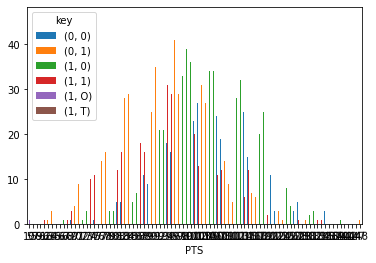

In [68]:
HA_score = score.plot.bar(rot=1)
HA_score.legend(title="key", loc= "upper left")

<AxesSubplot:xlabel='HA', ylabel='WL'>

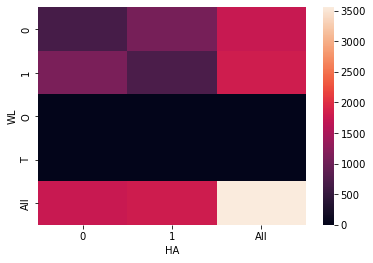

In [75]:
sns.heatmap(pd.crosstab(cavs_games1.WL,cavs_games1.HA, margins = True ))

<AxesSubplot:xlabel='HA-WL', ylabel='PTS'>

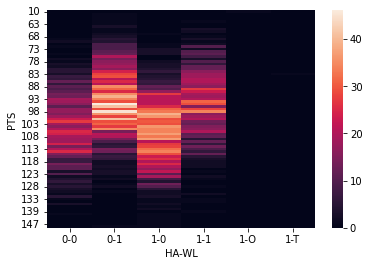

In [71]:
sns.heatmap(pd.crosstab(cavs_games1.PTS,[cavs_games1.HA, cavs_games1.WL]))

once again I need to get rid of the O and T because it is messing up the data. (Any suggestions would be helpful)

Next steps for this project car deciding which variables are important.  I also plan to cross tables and with the important variables. I will most likely add a regression. I still am deciding what is the best way to demonstrate the data that I have.